In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Calculating average rewards over 10 plays
# Function receives the probability of payout
# from that machine/arm
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    
    return reward
    
# Greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0
    meanReward = 0
    
    for key in a.keys():
        expected_reward = np.mean(a[key])
        if (expected_reward > meanReward):
            bestArm = key
            meanReward = expected_reward
                    
    return bestArm

In [3]:
# Tweak simulation parameters here
n = 10 # for an n-armed bandit problem
arms = np.random.rand(n) # probability of payouts for each arm
epsilon = 0.2 # How often should we pursue a non-greedy (exploratory) action?

In [4]:
nplays = int(1000) # Number of steps to play 
history = np.zeros((nplays, 2)) # To keep track of history of choices

# Hash table to keep tab of actions and list of rewards
av = {}

# Initialize the hash table
for i in range(10):
    av[i] = [0]

In [5]:
runningMeans = []
for i in range(nplays):
    # Choosing the best action, exploit or explore
    if random.random() > epsilon: # Greedy selection
        choice = bestArm(av)
    else: # Random action
        choice = np.random.choice(range(10))

    # Reward obtained for said action
    current_reward = reward(arms[choice])
    
    rewards = av[choice]
    rewards.append(current_reward)
    av[choice] = rewards

    history[i, :] = [choice, current_reward]

    runningMeans.append(np.mean(history[:i+1, 1]))

Text(0, 0.925, '(c)')

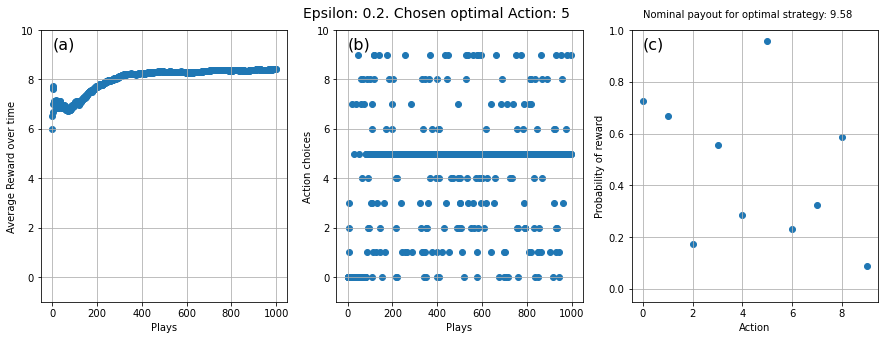

In [6]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.scatter(np.arange(nplays), runningMeans)
plt.xlabel("Plays")
plt.ylabel("Average Reward over time")
plt.ylim([-1, 10])
plt.grid()
plt.text(0, 9.25, '(a)', fontsize=16)

plt.subplot(1, 3, 2)
plt.ylabel("Action choices")
plt.xlabel("Plays")
plt.ylim([-1, 10])
plt.scatter(range(len(history[:, 0])), history[:, 0])
plt.text(-200, 10.5, "Epsilon: "+str(epsilon) +". Chosen optimal Action: "+str(np.where(arms == np.max(arms))[0][0]), size=14)
plt.grid()
plt.text(0, 9.25, '(b)', fontsize=16)

plt.subplot(1,3,3)
plt.scatter(range(10), arms)
plt.xlabel('Action')
plt.ylabel('Probability of reward')
plt.ylim([-0.05, 1])
title_text = 'Nominal payout for optimal strategy: {0:4.2f}'.format(10.*np.max(arms))
plt.text(0, 1.05, title_text)
plt.grid()
plt.text(0, .925, '(c)', fontsize=16)

Figure 1. (a) Average Reward received as a function of # plays - the agent learns to maximize returns over time (b) Action choice as a function of play #, demonstrating experience - the agent learns to pick the action with the highest average reward quickly (c) Average reward as a function of action choice - action 5 has the highest average payout

## Implementing the n-armed bandit with a softmax function

In [7]:
def softmax(av, tau=1.12):
    softm = np.exp(av/tau)/np.sum(np.exp(av/tau))
    return softm    

In [8]:
def update_record(record, choice, r):
    new_r = (record[choice, 0]*record[choice, 1] + r)/(record[choice, 0] + 1)
    record[choice, 0] += 1
    record[choice, 1] = new_r
    
    return record

In [9]:
# Tweak simulation parameters here

# Softmax implementation does not require an epsilon value
# Since the choice of action probabilities are weighted by their value
# at any given time step

# However, a 'tau' parameter has to be specified, which is a characteristic
# of the softmax function.
# An aside - tau isn't a very intuitive parameter, as it defines how spread out 
# or squished together the softmax probabilities are

n = 10 # for an n-armed bandit problem
tau = 1.12

# Let's keep the probability of payouts the same as the previous case
# arms = np.random.rand(n) # probability of payouts for each arm

In [10]:
record = np.zeros((n, 2))
nplays = int(1000) # Number of steps to play 
history = np.zeros((nplays, 2)) # To keep track of history of choices
rewards = [0]

In [11]:
for i in range(nplays):
    p = softmax(record[:, 1])
    choice = np.random.choice(np.arange(n), p=p)
    history[i, 0] = choice
    r = reward(arms[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i+1)*rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)  

Text(0, 0.925, '(c)')

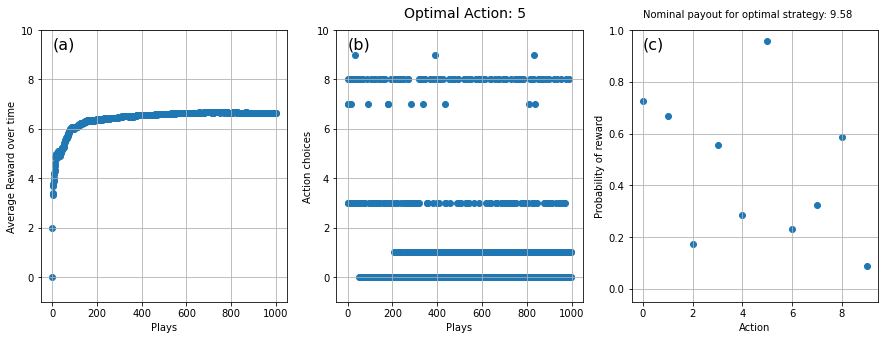

In [12]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.scatter(np.arange(len(rewards)), rewards)
plt.xlabel("Plays")
plt.ylabel("Average Reward over time")
plt.ylim([-1, 10])
plt.grid()
plt.text(0, 9.25, '(a)', fontsize=16)

plt.subplot(1, 3, 2)
plt.ylabel("Action choices")
plt.xlabel("Plays")
plt.ylim([-1, 10])
plt.scatter(range(len(history[:, 0])), history[:, 0])
plt.text(250, 10.5, "Optimal Action: "+str(np.where(arms == np.max(arms))[0][0]), size=14)
plt.grid()
plt.text(0, 9.25, '(b)', fontsize=16)

plt.subplot(1,3,3)
plt.scatter(range(10), arms)
plt.xlabel('Action')
plt.ylabel('Probability of reward')
plt.ylim([-0.05, 1])
title_text = 'Nominal payout for optimal strategy: {0:4.2f}'.format(10.*np.max(arms))
plt.text(0, 1.05, title_text)
plt.grid()
plt.text(0, .925, '(c)', fontsize=16)

Figure 2. (a) Average Reward received as a function of # plays - the agent learns to maximize returns over time (b) Action choice as a function of play #, demonstrating experience - the agent learns to pick the action with the highest average reward quickly (c) Average reward as a function of action choice - action 2 has the highest average payout